## VAST Pilot Planet Hunting

This notebook gives an example of how to use vast-tools in a notebook environment to find planets in the VAST Pilot Survey.

Planet searching does not have to be done separately and can be included in any query, but is done separate for the purposes of this example. Not all planets are visible in the images in VAST even if they are in the field, see Emil's posts in Slack for more information.

Below are the imports required for this example. The main import required from vast-tools is the Query class, Astropy objects are also imported.

In [1]:
from vasttools.query import Query
from astropy.coordinates import SkyCoord, Angle
import astropy.units as u
import matplotlib.pyplot as plt

In this example we will search for Jupiter and Venus. We will also check for the Moon, and if you have RACS available this will be found.

Planet searching is done through the normal query method as below. It's recommened to use the `TILE` images for planet searching.

The allowed 'planets' are all the solar system planets, in addition to `pluto`, `moon` and `sun`.

In [2]:
planets_query = Query(
    epochs="all", 
    planets=['jupiter', 'venus', 'moon'],
    crossmatch_radius=10.,
    base_folder='/import/ada1/askap/PILOT/release',
    use_tiles=True
)

RACS data selected!
Remember RACS data supplied by VAST is not final and results may vary.
RMS measurements are not supported with tiles!
Turning RMS measurements off.


Find the fields first.

In [3]:
planets_query.find_fields()

Looking at the fields_df below we see the fields for which Jupiter and Venus appear in. If you have RACS you'll also see the Moon. We'll go ahead and run `find_sources()`.

In [4]:
planets_query.fields_df

,epoch,field,sbid,dateobs,name,ra,dec,stokes,primary_field,skycoord,fields,planet
2,0,RACS_1739-25A,8576,2019-04-25 18:59:12.768,Jupiter,263.206678,-22.656523,I,RACS_1739-25A,"<SkyCoord (ICRS): (ra, dec) in deg\n (263.2...",[RACS_1739-25A],True
3,0,RACS_1727-18A,8584,2019-04-27 15:06:13.248,Jupiter,263.109241,-22.652624,I,RACS_1727-18A,"<SkyCoord (ICRS): (ra, dec) in deg\n (263.1...",[RACS_1727-18A],True
1,3x,VAST_1739-25A,10335,2019-10-29 12:34:02.450,Jupiter,261.965492,-23.032427,I,VAST_1739-25A,"<SkyCoord (ICRS): (ra, dec) in deg\n (261.9...",[VAST_1739-25A],True
0,2,VAST_1739-25A,10342,2019-10-30 12:16:21.873,Jupiter,262.168109,-23.044683,I,VAST_1739-25A,"<SkyCoord (ICRS): (ra, dec) in deg\n (262.1...",[VAST_1739-25A],True
4,0,RACS_1938-18A,8576,2019-04-25 21:49:24.816,Moon,295.819929,-21.541688,I,RACS_1938-18A,"<SkyCoord (ICRS): (ra, dec) in deg\n (295.8...",[RACS_1938-18A],True
5,0,RACS_0216+06A,8641,2019-05-04 00:01:08.342,Moon,31.944123,7.920226,I,RACS_0216+06A,"<SkyCoord (ICRS): (ra, dec) in deg\n (31.94...",[RACS_0216+06A],True
8,0,RACS_0037+00A,8578,2019-04-26 03:27:35.942,Venus,6.476221,1.047360,I,RACS_0037+00A,"<SkyCoord (ICRS): (ra, dec) in deg\n (6.476...",[RACS_0037+00A],True
6,8,VAST_2257-06A,11600,2020-01-26 05:56:11.831,Venus,346.428183,-7.065500,I,VAST_2257-06A,"<SkyCoord (ICRS): (ra, dec) in deg\n (346.4...",[VAST_2257-06A],True
7,9,VAST_2257-06A,11631,2020-01-27 05:52:17.376,Venus,347.519157,-6.560359,I,VAST_2257-06A,"<SkyCoord (ICRS): (ra, dec) in deg\n (347.5...",[VAST_2257-06A],True


In [5]:
planets_query.find_sources()
planets_query.results

name
Jupiter    <vasttools.source.Source object at 0x7fefdd8f7...
Moon       <vasttools.source.Source object at 0x7fefdd84a...
Venus      <vasttools.source.Source object at 0x7fefdd854...
Name: name, dtype: object

With the results in hand we can now take a look at the results:

In [6]:
jupiter = planets_query.results['Jupiter']
venus = planets_query.results['Venus']
moon = planets_query.results['Moon']

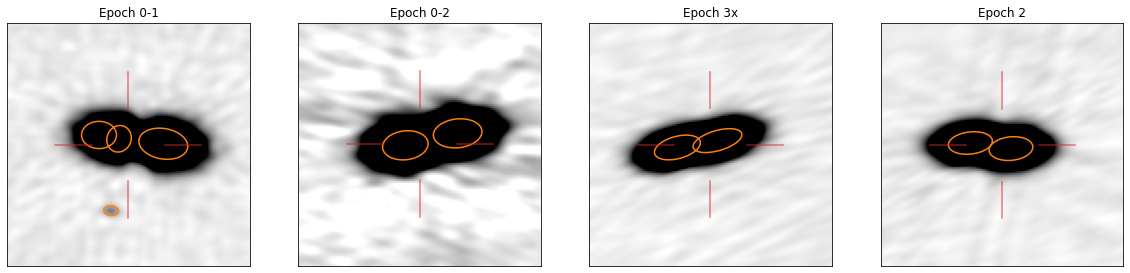

In [7]:
jupiter.plot_all_cutouts(figsize=(20,8), zscale=True, contrast=0.1, force=True)

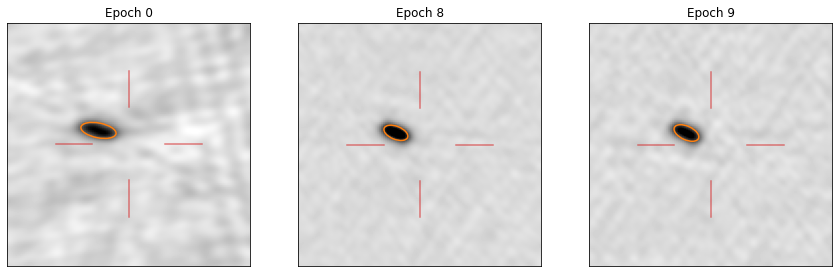

In [8]:
venus.plot_all_cutouts(figsize=(20,8))

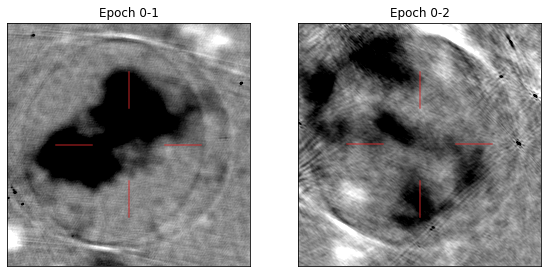

In [14]:
moon.plot_all_cutouts(figsize=(20,8), force=True, size=Angle(35. * u.arcmin), zscale=True, contrast=0.4, no_selavy=True)